<a href="https://colab.research.google.com/github/Ashif-khan033/Netflix_Movies_and_TV_Shows_Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies & TV Shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution 1**    - Mohd Ashif Khan
##### **Contribution 2**    - Mayank Belwal
##### **Contribution 3**    - Shubhangini Ganguli


# **Project Summary -**

1.The goal of the project was to analyze and cluster Netflix movies and TV shows based on their genre, director,cast,country and description, and to develop a recommender system that recommends movies and TV shows based on user preferences.

2.The project used a dataset of Netflix movies and TV shows.The dataset contained information such as the title, director, cast, country, date added, release year, rating, and genre of each movie and TV show.

3.The project first performed data cleaning and preprocessing on the dataset. This included handling missing values, converting data types, and creating new features..

4.The project then used unsupervised machine learning techniques such as k-means clustering and hierarchical clustering to cluster the movies and TV shows based on their genre,director,cast,country and description.

5.The project also developed a content-based recommender system that recommends movies and TV shows based on their similarity to other movies and TV shows.

6.The content-based recommender system used features such as genre, director, cast to compute the similarity between movies and TV shows. The similarity was measured using cosine similarity, which measures the cosine of the angle between two vectors in a high-dimensional space.

7.Finally the project demonstrated the usefulness of unsupervised machine learning techniques for analyzing and clustering large datasets of movies and TV shows, as well as the effectiveness of content-based recommender systems for providing personalized recommendations based on user preferences.

# **GitHub Link -**

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

In this project, we are required to do:

1.Exploratory Data Analysis

2.Understanding what type content is available in different countries

3.Is Netflix has increasingly focusing on TV rather than movies in recent years.

4.Clustering similar content by matching text-based features.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')
import plotly.express as px
import plotly.graph_objs as go


import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

import missingno as msno

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [ ]:
# Load Dataset
file_path = '/content/drive/MyDrive/AlmaBetter/Capstone_Project_4/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
df = pd.read_csv(file_path)

### Dataset First View

In [ ]:
recommender_df = df.copy()

In [ ]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f'Number of rows in datasets are {df.shape[0]}')
print(f'Number of columns in datasets are {df.shape[1]}')

Number of rows in datasets are 7787
Number of columns in datasets are 12


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f'Duplicates entries in datasets are {df.duplicated().sum()}')

Duplicates entries in datasets are 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()*100/len(df)

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

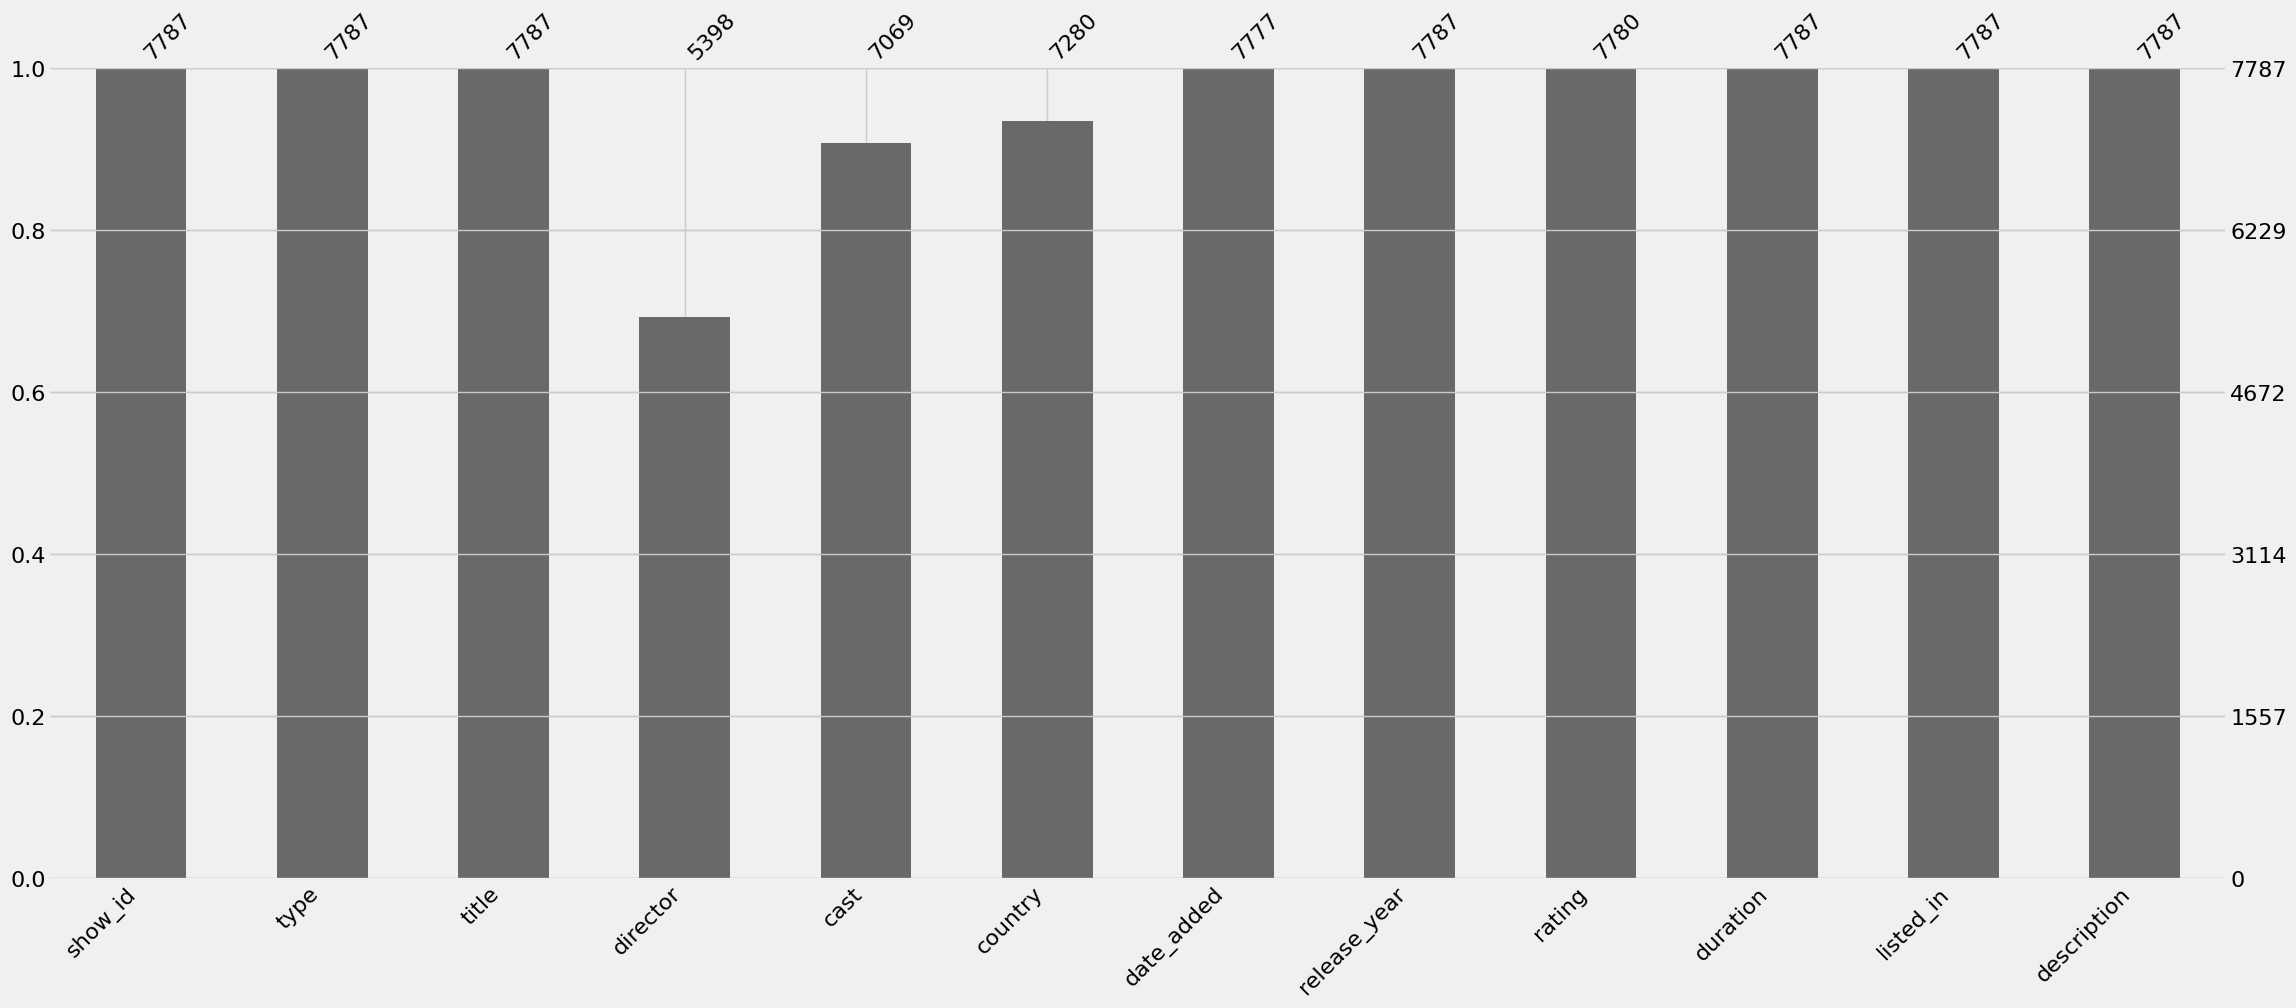

In [ ]:
# Visualizing the missing values
msno.bar(df)
plt.show()

### What did you know about your dataset?

* There are 7787 rows and 12 columns present in dataset.

* Datatypes of variables present in datasets are object as well as integer.

* There is no duplicate entries in the dataset.

* There are missing values present in the column director,cast,country and rating

#### Missing Values Imputation

In [ ]:
# Replacing missing values in the director, cast, and country column with 'Unknown'
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')

# Replacing the missing values present in rating column with mode
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

# Dropping the missing value present in date_added column
df.dropna(axis=0, inplace = True)

In [ ]:
clean_df = df[df != 'Unknown'].dropna()

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,release_year
count,7777.000000
mean,2013.935965
std,8.760694
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description 

* show_id : Unique ID for every Movie / Tv Show
* type : Identifier - A Movie or TV Show
* title : Title of the Movie / Tv Show
* director : Director of the Movie
* cast : Actors involved in the movie / show
* country : Country where the movie / show was produced
* date_added : Date it was added on Netflix
* release_year : Actual Releaseyear of the movie / show
* rating : TV Rating of the movie / show
* duration : Total Duration - in minutes or number of seasons
* listed_in : Genre
* description: The Summary description

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for elem in df.columns:
  if df[elem].nunique() < 50 :
    print("-"*100)
    print(" ")
    print(f'Unique values present in {elem} are')
    print(" ")
    print(df[elem].unique())
    print(" ")
    print("*"*100)

----------------------------------------------------------------------------------------------------
 
Unique values present in type are
 
['TV Show' 'Movie']
 
****************************************************************************************************
----------------------------------------------------------------------------------------------------
 
Unique values present in rating are
 
['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' 'TV-Y7' 'PG' 'G'
 'NC-17' 'TV-Y7-FV' 'UR']
 
****************************************************************************************************


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Dropping the column show_id
df.drop(columns = ['show_id'],inplace = True)

In [ ]:
# Looking datatypes of the feature available in dataset
df.dtypes

type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
df[df['type'] == 'TV Show']['duration'].unique()

# for tv shows duration is in seasons and for movies duration is in minutes

array(['4 Seasons', '1 Season', '2 Seasons', '3 Seasons', '5 Seasons',
       '9 Seasons', '8 Seasons', '6 Seasons', '11 Seasons', '7 Seasons',
       '13 Seasons', '12 Seasons', '10 Seasons', '16 Seasons',
       '15 Seasons'], dtype=object)

In [ ]:
# Splitting the duration column, and changing the datatype to integer
df['duration'] = df['duration'].apply(lambda x : int(x.split(" ")[0]))

In [ ]:
# Creating feature month name from date_added columns
df['month_added'] = df['date_added'].apply(lambda x : x.split(" ")[0])

In [ ]:
# Creating feature year from date_added columns
df['year_added'] = df['date_added'].apply(lambda x : x.split(" ")[-1])

In [ ]:
# Dropping the column date_added
df.drop(columns = ['date_added'],inplace = True)

In [ ]:
# Applying value counts on country
df['country'].value_counts()

United States                                                   2549
India                                                            923
Unknown                                                          506
United Kingdom                                                   396
Japan                                                            225
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 682, dtype: int64

In [ ]:
# Choosing the main country
df['country'] = df['country'].apply(lambda x : x.split(",")[0])

In [ ]:
# Choosing the main genres
df['genres'] = df['listed_in'].apply(lambda x : x.split(",")[0])

In [ ]:
# Applying value_counts on 'rating'.
df['rating'].value_counts().to_frame()

,rating
TV-MA,2868
TV-14,1928
TV-PG,804
R,665
PG-13,386
TV-Y,279
TV-Y7,270
PG,247
TV-G,194
NR,83


* TV-MA: This rating indicates that the content is intended for mature audiences only and may contain adult themes, language, nudity, violence, and other mature content.

* R: This rating indicates that the content is restricted and may contain adult themes, language, nudity, violence, and other mature content.

* PG-13: This rating indicates that the content may contain material that parents may find inappropriate for children under 13 years of age.

* TV-14: This rating indicates that the content may contain material that is inappropriate for children under 14 years of age.

* TV-PG: This rating indicates that the content is intended for a general audience but may contain some material that parents may find inappropriate for younger children.

* NR: This rating stands for "Not Rated" and indicates that the content has not been officially rated by a classification board.

* TV-G: This rating indicates that the content is suitable for a general audience and contains little or no violence, sexual content, or mature themes.

* TV-Y: This rating indicates that the content is intended for children under 7 years of age.

* TV-Y7: This rating indicates that the content is intended for children 7 years and older.

* PG: This rating indicates that the content may contain material that parents may find inappropriate for younger children.

* G: This rating indicates that the content is suitable for all ages and contains little or no violence, sexual content, or mature themes.

* NC-17: This rating indicates that the content is intended for adults only and may contain adult themes, language, nudity, violence, and other mature content.

* TV-Y7-FV: This rating indicates that the content is intended for children 7 years and older and may contain fantasy violence.

* UR: This rating stands for "Unrated" and indicates that the content has not been officially rated by a classification board.

In [ ]:
# On the basis of description of rating ,assinging rating according to age_groups
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'}

df['target_ages'] = df['rating'].replace(ratings_ages)    

In [ ]:
# Now checking unique values present in target_ages
df['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

In [ ]:
# Separating dataframe on the basis of type of show
movies_df = df[df['type'] == 'Movie']
tv_df = df[df['type'] == 'TV Show']

### What all manipulations have you done and insights you found?

Following Data Manipulations are done:

* Dropped the column show_id
* Splitted the duration column in order to remove units present inside the category of duration column.
* Created feature month name from date_added columns.
* Created feature year from date_added columns.
* Selected the principle country from the available country list.
* Selected the main genres from the listed genres.
* On the basis of description of rating,assingned rating according to age_groups.
* Created movies_df and tv_df on the basis of type of show

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

**UNIVARIATE ANALYSIS** 

####Content Type on Netflix

In [ ]:
def pie_chart(data, feature):
  fig = go.Figure()

  # Adding a pie chart to the figure
  fig.add_trace(go.Pie(labels=data[feature].value_counts().index,
                       values=data[feature].value_counts().values,
                       hole=0.3,
                       marker=dict(colors=['#ff9999','#66b3ff'])))

  # Updating the layout
  fig.update_layout(title='Netflix Content Distribution (Pie Chart)',
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False))

  # Showing the plot
  fig.show()


In [ ]:
# Plotting pie chart
# Calling the function
pie_chart(df,'type')

##### 1. Why did you pick the specific chart?

I have used pie chart beacause Pie charts are an effective visualization technique when the categories present inside a feature are limited in number. They allow us to represent the percentage distribution of each category in a clear and concise manner.

##### 2. What is/are the insight(s) found from the chart?

Around 69% content available on Netflix are Movie and 31% are TV Shows.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This information can be used to develop personalized recommendations for users based on their viewing habits and preferences. If a user tends to watch mostly movies, the recommendation algorithm can suggest similar movies to watch, which can increase user engagement and satisfaction.

**MOVIE RATING ANALYSIS**

In [ ]:
# Creating a function to fetch required dataframe
# def create_temp_df(data,feature):
#   temp_df = data.groupby(feature).size().reset_index().rename(columns = {0:'counts'}).sort_values(by = ['counts'],ascending = False)
#   return temp_df

In [ ]:
def create_temp_df(data, feature):
    """
    This function creates a temporary dataframe by grouping the 'data' dataframe by a specified 'feature'.
    It calculates the size of each group, renames the count column to 'counts', sorts the dataframe in descending order based on 'counts',
    and returns the resulting temporary dataframe.

    Parameters:
    data (pandas.DataFrame): The input dataframe.
    feature (str): The name of the feature to group the dataframe by.

    Returns:
    temp_df (pandas.DataFrame): The resulting temporary dataframe.
    """

    # Grouping the 'data' dataframe by the specified 'feature' and calculating the size of each group
    temp_df = data.groupby(feature).size().reset_index()

    # Renaming the count column to 'counts'
    temp_df = temp_df.rename(columns={0: 'counts'})

    # Sorting the dataframe in descending order based on 'counts'
    temp_df = temp_df.sort_values(by='counts', ascending=False)

    # Returning the resulting temporary dataframe
    return temp_df


In [ ]:
# Creating a function to plot bar plot
def plot_bar_chart(data, x, y, title, counts):
    """
    This function takes in a dataframe, x and y variables to be plotted, and additional parameters to create a bar chart.
    It uses Plotly Express to create a bar chart with color-coding based on the 'counts' variable.
    The function also adds axis labels, font, and formatting options to the plot and displays it using the show() function.

    Parameters:
    data (pandas.DataFrame): The input dataframe.
    x (str): The name of the column to be plotted on the x-axis.
    y (str): The name of the column to be plotted on the y-axis.
    title (str): The title of the plot.
    counts (str): The name of the column used for color-coding the plot.
    
    """
    
    # Creating a bar chart using Plotly Express
    fig = px.bar(data , x = x , y = y,
             title = title,
             color='counts',
             color_continuous_scale='teal',
             labels=dict(counts=counts))
    
    # Adding formatting options to the plot
    fig.update_layout(yaxis=dict(showgrid=True, gridwidth=1, gridcolor='lightgray'),
                  font=dict(size=15, color='black', family='Arial, sans-serif'),
                  title=dict(x=0.5, font=dict(size=20)),
                  xaxis=dict(title=dict(font=dict(size=15))),
                  bargap=0.1,
                  bargroupgap=0.5)
    
    # Add hover text to the plot and customize the marker colors and line widths
    fig.update_traces(texttemplate='%{y}',
                  textposition='outside',
                  hoverinfo='x+y',
                  marker=dict(color='#FF0092', line=dict(color='black', width=1.5))) 
    
    # Display the resulting plot
    fig.show()


  

In [ ]:
# Calling the function to crate required dataframe
rating_df = create_temp_df(df,'rating')
rating_df

,rating,counts
8,TV-MA,2868
6,TV-14,1928
9,TV-PG,804
5,R,665
4,PG-13,386
10,TV-Y,279
11,TV-Y7,270
3,PG,247
7,TV-G,194
2,NR,83


In [ ]:
# Calling the function for the visualization
plot_bar_chart(data = rating_df,x = 'rating',y = 'counts',title = 'Countplot of rating of Movies & TV Shows',counts = 'counts of rating')

##### 1. Why did you pick the specific chart?

I have used bar chart it is more visually appealing for the variable that i have choosen.

##### 2. What is/are the insight(s) found from the chart?

Netflix Contains more Movies and Shows that have rating "TV-MA" followed by "TV-14"

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

On the positive side, having a high number of movies and shows with mature ratings can appeal to a certain demographic of viewers who prefer this type of content, potentially leading to increased viewership and subscriber growth.

On the negative side, the mature content might not be suitable for all ages, and some viewers may not be comfortable watching it. This could result in a decrease in the number of subscribers, especially if these viewers cancel their subscription or choose not to subscribe in the first place.

**Content Added Over the Years**

In [ ]:
# create_temp_df function calling
show_df = create_temp_df(df,'year_added')
show_df

,year_added,counts
11,2019,2153
12,2020,2009
10,2018,1685
9,2017,1225
8,2016,443
13,2021,117
7,2015,88
6,2014,25
3,2011,13
5,2013,11


In [ ]:
# Calling the function for the visualization
plot_bar_chart(data = show_df,x = 'year_added',y = 'counts',title = 'Year wise shows distributions',counts = 'counts of shows')

##### 2. What is/are the insight(s) found from the chart?

from 2010 to 2019 netflix has shown tremendous increase in number of shows i.e 1 show in 2010 to 2153 show in 2019.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The tremendous increase in the number of shows offered by Netflix from 2010 to 2019 is a positive indicator for the company's business impact. This increase in content has helped Netflix attract more subscribers and retain existing ones, as users have more choices of shows and movies to watch. The growth in content also allowed Netflix to expand into new markets and cater to a wider range of audience preferences.

ANALYSIS OF SHOWS RELEASE YEAR

In [ ]:
# Calling the function create_temp_df
release_df = create_temp_df(df,'release_year').iloc[:20,:]
release_df

,release_year,counts
69,2018,1120
68,2017,1012
70,2019,996
67,2016,881
71,2020,868
66,2015,539
65,2014,334
64,2013,266
63,2012,218
61,2010,172


In [ ]:
# Calling the function for the visualization
plot_bar_chart(data = release_df,x = 'release_year',y = 'counts',title = 'Analysis of shows Releases',counts = 'counts of released shows')

##### 2. What is/are the insight(s) found from the chart?

From 2001 to 2018, the number of shows released by Netflix increased every year. However, in 2019 and 2020, there was a slight decline, which is likely due to the impact of COVID-19. As we know, there were lockdowns across the globe during that time.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Trend suggests that Netflix has been successful in consistently increasing the number of shows it produces and releases, which has likely contributed to its success in the streaming market. However, the decline in the number of shows in 2019 and 2020 is likely due to the impact of COVID-19, which caused production delays and disruptions in the entertainment industry.

ANALYSIS OF MONTHLY ADDITION OF SHOWS 

In [ ]:
# Calling the function
month_added_df = create_temp_df(df,'month_added')
# Dropping the rows present at index 0 because it is an empty rows having no values of month
month_added_df = month_added_df.drop(0)
month_added_df

,month_added,counts
3,December,817
11,October,780
5,January,746
10,November,730
8,March,661
12,September,614
2,August,612
1,April,596
6,July,592
7,June,538


In [ ]:
# Calling the function for the visualization
plot_bar_chart(data = month_added_df,x = 'month_added',y = 'counts',title = 'Analysis of Monthly Addition of Shows',counts = 'counts of added shows')


##### 2. What is/are the insight(s) found from the chart?

The top three months in a calendar year during which the most number of shows are added to the platform are December, followed by October, and then January.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

knowing which months are most popular for adding new content can help Netflix plan its content release schedule, allowing the company to maximize the impact of its programming and attract and retain more subscribers. This information could also help the company target its marketing efforts more effectively, focusing on promoting its new releases during the months when viewers are most likely to be seeking out fresh content.

TOP 10 CONTENT CREATING COUNTRIES

In [ ]:
# Calling the function
country_df = create_temp_df(df,'country')
# Dropping country having unknownn lablel
country_df = country_df[country_df['country'] != 'Unknown'].iloc[:10,:]
country_df

,country,counts
75,United States,2877
28,India,956
74,United Kingdom,576
9,Canada,259
35,Japan,236
19,France,196
64,South Korea,194
66,Spain,168
42,Mexico,123
1,Australia,107


In [ ]:
# Calling the function for the visualization
plot_bar_chart(data = country_df,x = 'country',y = 'counts',title = 'Top 10 Content Creating Countries',counts = 'Content Created')


##### 2. What is/are the insight(s) found from the chart?

Majority of content available on the popular streaming platform Netflix is produced in the United States, followed by content produced in India and the United Kingdom.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Insights about the availability of content on Netflix can help create positive business impact by informing decisions about which titles to acquire and produce. However, failure to invest in non-American content or producing content that is not well received can lead to negative growth.

TARGET AUDIENCE OF CONTENT

In [ ]:
# Calling the function
targeted_audience_df = create_temp_df(df,'target_ages')
targeted_audience_df

,target_ages,counts
0,Adults,3624
3,Teens,2314
2,Older Kids,1327
1,Kids,512


In [ ]:
# Calling the function for the visualization
plot_bar_chart(data = targeted_audience_df,x = 'target_ages',y = 'counts',title = '',counts = 'Content Created')

##### 2. What is/are the insight(s) found from the chart?

It can be observed that the majority of content available on Netflix is suitable for adult audiences, followed by teenagers, older kids, and kids. This means that viewers have access to a wide range of shows and movies that are targeted towards mature audiences, such as dramas and crime thrillers, as well as content that is suitable for younger viewers, such as cartoons and family-friendly movies.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Insights about the suitability of content for different age groups can create a positive business impact for Netflix by tailoring its offerings to better meet viewers' needs. However, failure to invest in certain age groups or producing content that is not well received can lead to negative growth.

In [ ]:
# Callling the function so that we can get genres_df
genres_df = create_temp_df(df,'genres')
# Getting top 20 genres 
genres_df_20 = genres_df.iloc[:20,:]
genres_df_20

,genres,counts
12,Dramas,1384
7,Comedies,1074
10,Documentaries,751
0,Action & Adventure,721
16,International TV Shows,689
4,Children & Family Movies,502
8,Crime TV Shows,369
17,Kids' TV,357
27,Stand-Up Comedy,321
13,Horror Movies,244


In [ ]:
# Chart - 8 visualization code
plot_bar_chart(data = genres_df_20,x = 'genres',y = 'counts',title = 'Top 20 Genres',counts = 'Genres Counts')

##### 2. What is/are the insight(s) found from the chart?

Drama is the most popular genre of content available on Netflix, followed by comedies and documentaries. Action and adventure are also popular genres, with many of the platform's most-watched shows and movies falling under this category.Suprisingly,among all the genres thrillers content are less in number.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Insights about the popularity of different genres on Netflix can create a positive business impact by informing decisions about which titles to acquire and produce. However, failure to invest in less popular genres or producing content that is not well received can lead to negative growth.

TV shows with Most Number of Seasons

In [ ]:
# Choosing title and duration of top 20 tv shows which has most number of seasons
top_20_seasons = tv_df[['title','duration']].sort_values(by = 'duration',ascending = False).iloc[:20,:]
top_20_seasons

,title,duration
2538,Grey's Anatomy,16
5912,Supernatural,15
4438,NCIS,15
1471,COMEDIANS of the world,13
1537,Criminal Minds,12
7169,Trailer Park Boys,12
2678,Heartland,11
1300,Cheers,11
1597,Danger Mouse: Classic Collection,10
5538,Shameless (U.S.),10


In [ ]:
# Create the bar chart
fig = px.bar(top_20_seasons, x='title', y='duration')
fig.update_layout(
    title='Number of seasons of Tv Shows',
    xaxis_title='Title',
    yaxis_title='Duratio ( Number of Seasons )'
)

# Display the chart
fig.show()

##### 2. What is/are the insight(s) found from the chart?

Grey's Anatomy has most number of seasons i.e 16 seasons while Supernatural & NCIS have equal number of seasons i.e 15 seasons

**Distribution of Movie Duration**

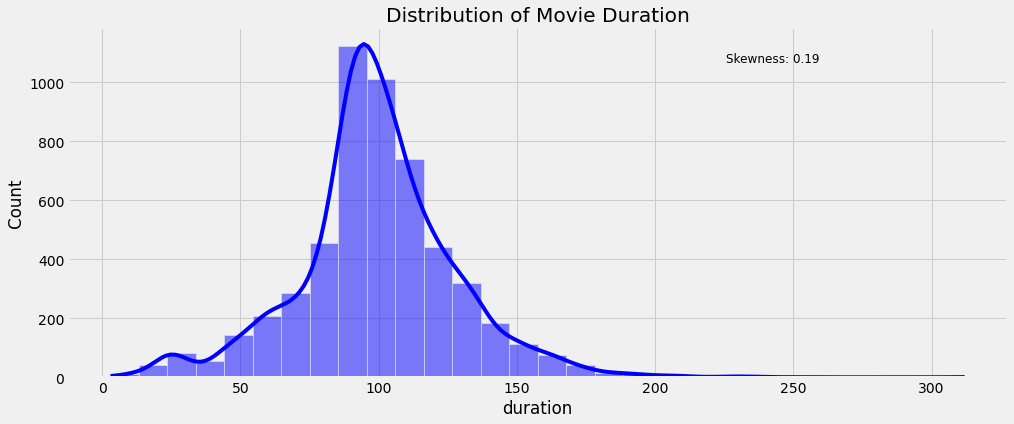

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize = (15,6))
sns.histplot(data = movies_df,x = 'duration',kde = True,color = 'blue',bins = 30)

# add the skewness value to the plot
skewness = movies_df['duration'].skew()
plt.text(0.7, 0.9, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.title('Distribution of Movie Duration')
plt.show()


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

Based on the skewness value of 0.19, the histogram of duration for movies is approximately symmetric or slightly skewed to the right. This means that the distribution of movie durations is relatively balanced, with a slight tendency towards longer movies.

One possible insight from this chart is that there is a good mix of short and long movies available on Netflix. This could indicate that viewers have a range of options to choose from, including shorter movies for those with limited time and longer movies for those looking for a more immersive experience.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Insights about the distribution of movie durations on Netflix can potentially help in creating a positive business impact for the company. By understanding the balance of movie durations, Netflix can make informed decisions about which titles to acquire and produce, leading to increased viewership and revenue.

One possible insight that could lead to negative growth is if the majority of viewers have a strong preference for movies of a specific duration. If Netflix fails to provide a sufficient number of movies that meet viewer preferences, it could result in a decrease in subscribers or a decrease in engagement with the platform.

Another possible insight that could lead to negative growth is if the duration of a movie has a strong correlation with viewer ratings. For example, if viewers consistently rate shorter movies more positively than longer movies, then Netflix may need to adjust its content strategy to focus on producing more shorter movies.

**TOP 10 Director of Movies**

In [ ]:
movies_director_df = movies_df[movies_df['director'] != 'Unknown']

# Calling the function "create_temp_df" so that we can get top directors
top_10_movie_direct_df = create_temp_df(movies_director_df,'director').iloc[:10,:]

top_10_movie_direct_df

,director,counts
2962,"Raúl Campos, Jan Suter",18
2235,Marcus Raboy,15
1546,Jay Karas,14
605,Cathy Garcia-Molina,13
3867,Youssef Chahine,12
2300,Martin Scorsese,12
1543,Jay Chapman,12
3472,Steven Spielberg,10
847,David Dhawan,9
3328,Shannon Hartman,8


In [ ]:
# Calling the function "plot_bar_chart" for visualization purpose
plot_bar_chart(data = top_10_movie_direct_df,x = 'director',y = 'counts',title = 'Top 10 Movies Director',counts = 'Number of Movies Directed')

##### 2. What is/are the insight(s) found from the chart?

While data for the names of most directors is not available, from the available data, we can determine the top three directors of movies content on Netflix. According to the available data, the top three directors are Raul Campos and Jan Suter, Marcus Raboy, and Jay Karas.

It is worth noting that the available data may not be a representative sample of all the content available on Netflix, and there may be other directors with a significant number of titles on the platform. Nonetheless, the available data suggests that these three directors have been responsible for a substantial amount of content on Netflix.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that Raul Campos and Jan Suter, Marcus Raboy, and Jay Karas are the top three directors of overall content on Netflix could potentially have a positive business impact. By understanding which directors are most successful on the platform, Netflix can make more informed decisions about which directors to collaborate with and which titles to produce or acquire. This could lead to more successful titles, higher viewership, and increased revenue.